In [ ]:
#My dataset is available in googledrive; so I am accessing my drive from colab
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
#Once this is executed, you will see your drive appearing on the left hand side

Mounted at /content/drive


In [ ]:
# Define paths to the dataset
train_dir = '/content/drive/MyDrive/PNEUMONIA_DATASET/train'
test_dir  = '/content/drive/MyDrive/PNEUMONIA_DATASET/test'

In [ ]:
import os
print("Train NORMAL:", len(os.listdir(train_dir + '/NORMAL')))
print("Train PNEUMONIA:", len(os.listdir(train_dir + '/PNEUMONIA')))
print("Test NORMAL:", len(os.listdir(test_dir + '/NORMAL')))
print("Test PNEUMONIA:", len(os.listdir(test_dir + '/PNEUMONIA')))

Train NORMAL: 600
Train PNEUMONIA: 600
Test NORMAL: 60
Test PNEUMONIA: 60


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create ImageDataGenerator for training set
train_datagen = ImageDataGenerator(
    rescale=1./255, #normalisation / feature scaling
    validation_split=0.2  # Spliting 20% of the images for validation
)

# Load and prepare training data
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',  # 'binary' for binary classification (norval vs pneumonia)
    subset='training'  # Specifying 'training' for the training set
)

# Create ImageDataGenerator for validation set
validation_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Note: Using the same validation split as in the training set
)

# Load and prepare validation data
validation_data = validation_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',
    subset='validation'  # Specifying 'validation' for the validation set
)

Found 960 images belonging to 2 classes.
Found 240 images belonging to 2 classes.


In [ ]:
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,UpSampling2D, Dropout

In [ ]:
# create CNN model - custom-made

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(256,256,3)))  # 32 filters
model.add(MaxPooling2D(pool_size=(2,2),strides=2,))

model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2))

model.add(Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,))

model.add(Flatten())

model.add(Dense(128,activation='relu')) #feature reduction
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))  #output layer

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
from keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy']) #binary_crossentropy - binary classification

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,847,297 (56.64 MB)

 Trainable params: 14,847,297 (56.64 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(train_data, epochs=20, validation_data=validation_data)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 212s 7s/step - accuracy: 0.5986 - loss: 0.7227 - val_accuracy: 0.8542 - val_loss: 0.3356
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 169s 6s/step - accuracy: 0.9236 - loss: 0.2052 - val_accuracy: 0.8708 - val_loss: 0.2890
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 202s 6s/step - accuracy: 0.9597 - loss: 0.0938 - val_accuracy: 0.9125 - val_loss: 0.2373
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 177s 6s/step - accuracy: 0.9805 - loss: 0.0482 - val_accuracy: 0.9333 - val_loss: 0.2075
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 168s 6s/step - accuracy: 0.9728 - loss: 0.0767 - val_accuracy: 0.8875 - val_loss: 0.4050
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 168s 6s/step - accuracy: 0.9820 - loss: 0.0508 - val_accuracy: 0.9250 - val_loss: 0.2574
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 177s 6s/step - accuracy: 0.9849 - loss: 0.0308 - val_accuracy: 0.9417 - val_loss: 0.3640
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 169s 6s/step - accuracy: 0.9874 - loss: 0.0346 - val_accuracy: 0.9250 - v

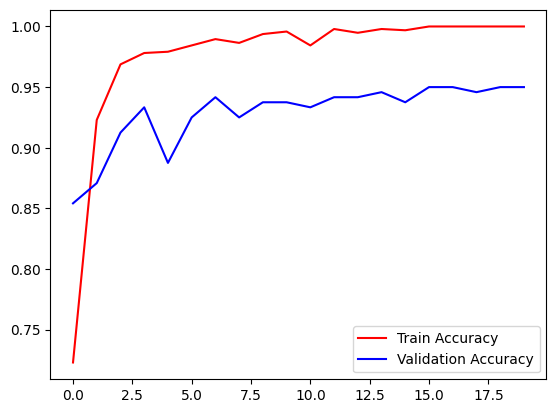

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='Train Accuracy')
plt.plot(history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.legend()
plt.show()

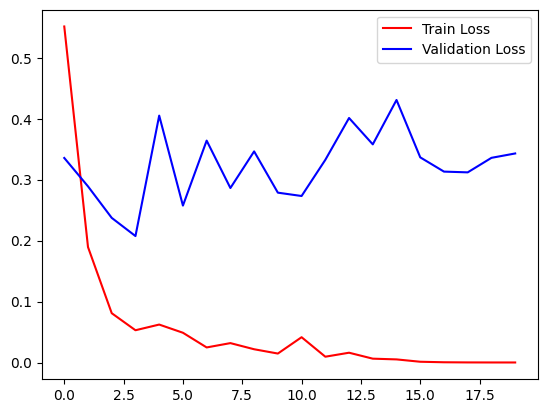

In [ ]:
plt.plot(history.history['loss'],color='red',label='Train Loss')
plt.plot(history.history['val_loss'],color='blue',label='Validation Loss')
plt.legend()
plt.show()

In [14]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary'
)

Found 120 images belonging to 2 classes.


In [ ]:
#predict the test data
predictions = model.predict(test_data)


4/4 ━━━━━━━━━━━━━━━━━━━━ 19s 5s/step


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming we have ground truth labels (true_labels) and predicted labels (predictions)
true_labels = test_data.classes
predicted_labels = (predictions > 0.5).astype(int)  # Adjusting the threshold as needed

# Calculate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Print classification report
print("Classification Report:")
print(classification_report(true_labels, predicted_labels))

Confusion Matrix:
[[ 9 51]
 [10 50]]
Classification Report:
              precision    recall  f1-score   support

           0       0.47      0.15      0.23        60
           1       0.50      0.83      0.62        60

    accuracy                           0.49       120
   macro avg       0.48      0.49      0.42       120
weighted avg       0.48      0.49      0.42       120



There is overfitting and therefore we are applying Batchnormalisation and Dropout techniques to handle overfitting

In [10]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))  # 32 filters
model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu')) #feature reduction
model.add(Dropout(0.1))  # added to reduce overfitting
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))  # added to reduce overfitting
model.add(Dense(1,activation='sigmoid'))  #output layer

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
from keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [12]:
history = model.fit(train_data, epochs=20, validation_data=validation_data)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 282s 9s/step - accuracy: 0.8009 - loss: 4.5730 - val_accuracy: 0.5000 - val_loss: 6.7765
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 263s 9s/step - accuracy: 0.9510 - loss: 0.7972 - val_accuracy: 0.5000 - val_loss: 33.6029
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 253s 8s/step - accuracy: 0.9671 - loss: 0.2595 - val_accuracy: 0.5000 - val_loss: 40.5016
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 268s 9s/step - accuracy: 0.9692 - loss: 0.3340 - val_accuracy: 0.5000 - val_loss: 52.0915
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 253s 8s/step - accuracy: 0.9780 - loss: 0.4660 - val_accuracy: 0.5000 - val_loss: 53.2468
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 264s 9s/step - accuracy: 0.9771 - loss: 0.2863 - val_accuracy: 0.5000 - val_loss: 66.1323
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 249s 8s/step - accuracy: 0.9837 - loss: 0.1560 - val_accuracy: 0.5000 - val_loss: 49.4630
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 257s 9s/step - accuracy: 0.9896 - loss: 0.1289 - val_accuracy: 0.50

In [15]:
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary'
)

Found 120 images belonging to 2 classes.


In [16]:
predictions = model.predict(test_data)

4/4 ━━━━━━━━━━━━━━━━━━━━ 19s 5s/step


In [17]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have ground truth labels (true_labels) and predicted labels (predictions)
true_labels = test_data.classes
predicted_labels = (predictions > 0.5).astype(int)  # Adjust the threshold as needed

# Calculate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Print classification report
print("Classification Report after applying techniques to handle overfitting:")
print(classification_report(true_labels, predicted_labels))

Confusion Matrix:
[[26 34]
 [25 35]]
Classification Report after applying techniques to handle overfitting:
              precision    recall  f1-score   support

           0       0.51      0.43      0.47        60
           1       0.51      0.58      0.54        60

    accuracy                           0.51       120
   macro avg       0.51      0.51      0.51       120
weighted avg       0.51      0.51      0.51       120



Using Pre-trained model - Resnet

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

resnet_model = Sequential()    #ResNet50 is a pre-trained model
pretrained_model = tf.keras.applications.ResNet50(include_top = False, #because i have my own image of a diff dimension
                                                input_shape = (256,256,3),
                                                pooling = 'max', classes = 2,
                                                weights = 'imagenet')
for layer in pretrained_model.layers:
    layer.trainable = False  #all layers in the Resnet50 is not trainable; keep those weights; I am going to add my own i/p and other layers

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation = 'relu'))
resnet_model.add(Dense(1, activation = 'sigmoid'))

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
from keras.optimizers import Adam
resnet_model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = resnet_model.fit(train_data, epochs=20, validation_data=validation_data)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 323s 11s/step - accuracy: 0.4991 - loss: 3.0008 - val_accuracy: 0.5875 - val_loss: 0.6251
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 309s 10s/step - accuracy: 0.6804 - loss: 0.5529 - val_accuracy: 0.7833 - val_loss: 0.4947
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 311s 10s/step - accuracy: 0.8201 - loss: 0.4360 - val_accuracy: 0.7792 - val_loss: 0.4973
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 329s 11s/step - accuracy: 0.8335 - loss: 0.3837 - val_accuracy: 0.7792 - val_loss: 0.4941
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 314s 10s/step - accuracy: 0.8727 - loss: 0.3281 - val_accuracy: 0.7292 - val_loss: 0.4709
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 309s 10s/step - accuracy: 0.8216 - loss: 0.3824 - val_accuracy: 0.8417 - val_loss: 0.3865
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 313s 10s/step - accuracy: 0.8694 - loss: 0.3095 - val_accuracy: 0.9000 - val_loss: 0.3052
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 312s 10s/step - accuracy: 0.9211 - loss: 0.2419 - val_accuracy: 0.

In [ ]:
predictions = resnet_model.predict(test_data)

4/4 ━━━━━━━━━━━━━━━━━━━━ 31s 7s/step


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have ground truth labels (true_labels) and predicted labels (predictions)
true_labels = test_data.classes
predicted_labels = (predictions > 0.5).astype(int)  # Adjust the threshold as needed

# Calculate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Print classification report
print("Classification Report after applying techniques to handle overfitting:")
print(classification_report(true_labels, predicted_labels))

Confusion Matrix:
[[13 47]
 [12 48]]
Classification Report after applying techniques to handle overfitting:
              precision    recall  f1-score   support

           0       0.52      0.22      0.31        60
           1       0.51      0.80      0.62        60

    accuracy                           0.51       120
   macro avg       0.51      0.51      0.46       120
weighted avg       0.51      0.51      0.46       120

